In [2]:
import os

files = folders = 0
for _, dirnames, filenames in os.walk("../rawdata"):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)
print ("{:,} files, {:,} folders".format(files, folders))

81,776 files, 8,624 folders


In [2]:
import numpy as np
import scipy.ndimage as ndi
from skimage import measure,color,morphology
import matplotlib.pyplot as plt

(512, 768, 3)


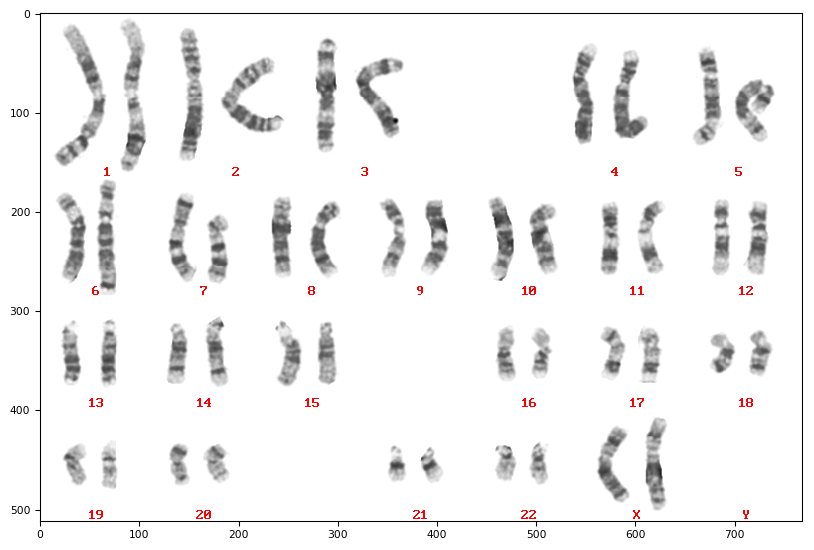

In [57]:
from skimage import io
import skimage.external.tifffile as tif
cur_dir="36388A/"
cur_file="BK.tif"
save_dir="../karyotype_segment/"
image = tif.imread("../rawdata/"+cur_dir+cur_file)
#size not the same
print(image.shape)
tif.imshow(image,cmap='gray');

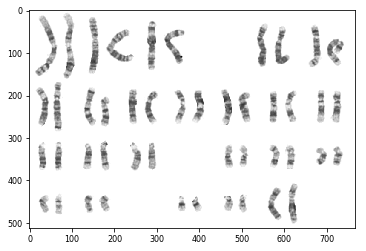

In [58]:
width=image.shape[0]
height=image.shape[1]
for i in range(width):
    for j in range(height):
        if image[i][j][0]==255 and image[i][j][1]==0 and image[i][j][2]==0:
            image[i][j]=[255,255,255]
plt.imshow(image)

/home/hywang/anaconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:229: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/hywang/anaconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:231: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


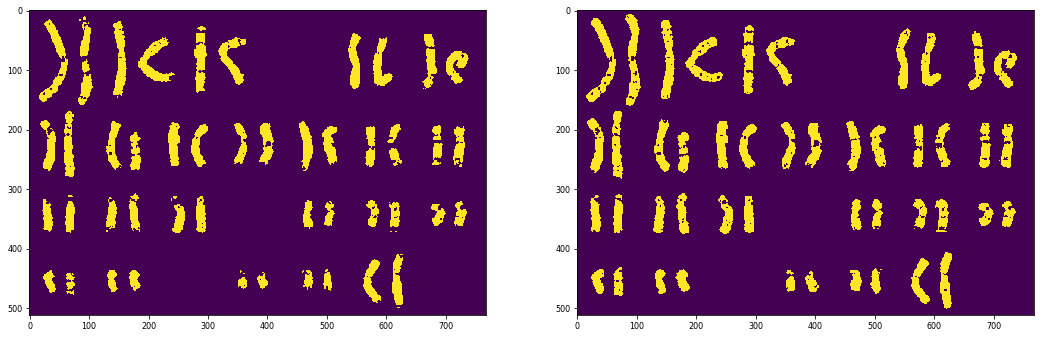

In [59]:
from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.color import rgb2gray
grayscale = rgb2gray(image)
global_thresh = threshold_otsu(grayscale)
binary_global = grayscale < global_thresh
block_size = 49
binary_adaptive = ~threshold_adaptive(grayscale, block_size, offset=0)
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,9))
ax1.imshow(binary_global)
ax2.imshow(binary_adaptive)

In [60]:
out=morphology.remove_small_objects(binary_global,min_size=20,connectivity=1)
out2=morphology.remove_small_objects(binary_adaptive,min_size=20,connectivity=1)

In [61]:
from skimage.morphology import closing, square
out2c= closing(out2, square(4))
labels=measure.label(out2c,connectivity=2)  #8连通区域标记
dst2=color.label2rgb(labels)  #根据不同的标记显示不同的颜色

In [ ]:
from skimage.measure import label, regionprops
import os
regions = regionprops(labels)
import heapq
if len(regions)>46:
    num=46
else:
    num=len(regions)
#sort regions according to its top left corner, limit min(46,len(regions))
newregions=heapq.nlargest(num,regions.copy(), key=lambda s: (s.bbox[2]-s.bbox[0])*(
s.bbox[3]-s.bbox[1]))
newregions=sorted(newregions, key = lambda x: (x.bbox[0], x.bbox[1]))
set1=sorted(newregions[:10],key=lambda x:x.bbox[1])
set2=sorted(newregions[10:24],key=lambda x:x.bbox[1])
set3=sorted(newregions[24:36],key=lambda x:x.bbox[1])
set4=sorted(newregions[36:],key=lambda x:x.bbox[1])
newregions=set1+set2+set3+set4
print(len(newregions))
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
count=1
for props in newregions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1)
    if count%2==0:
        signal="b.png"
    else:
        signal="a.png"
    newfolder=save_dir+cur_dir
#     newfolder="../karyotype_segment/36428A2/"
#     if not os.path.exists(newfolder):
#         os.mkdir(newfolder)
#     io.imsave(newfolder+str((count+1)//2)+signal,image[minr:maxr,minc:maxc])
    count+=1
plt.show()

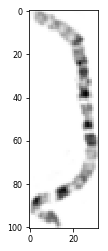

In [61]:
s=newregions[0]
minr, minc, maxr, maxc = s.bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.imshow(image[minr:maxr,minc:maxc])

In [121]:
# from skimage.morphology import closing, square
# outc= closing(out, square(7))
# labels=measure.label(outc,connectivity=2)  #8连通区域标记
# dst=color.label2rgb(labels)  #根据不同的标记显示不同的颜色
# print('regions number:',labels.max()+1)  #显示连通区域块数(从0开始标记)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
# ax1.imshow(outc, plt.cm.gray, interpolation='nearest')
# ax1.axis('off')
# ax2.imshow(dst,interpolation='nearest')
# ax2.axis('off')
# fig.tight_layout()
# plt.show()